# Выбор локации для скважины
Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой Bootstrap.

Шаги для выбора локации:

В избранном регионе ищут месторождения, для каждого определяют значения признаков;

Строят модель и оценивают объём запасов;

Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;

Прибыль равна суммарной прибыли отобранных месторождений.

## 1.  Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
try:
    data_1 = pd.read_csv(r'C:\Users\kuzmi\Downloads\geo_data_0.csv')
except:
    data_1 = pd.read_csv('/datasets/geo_data_0.csv')    

In [3]:
try:
    data_2 = pd.read_csv(r'C:\Users\kuzmi\Downloads\geo_data_1.csv')
except:
    data_2 = pd.read_csv('/datasets/geo_data_1.csv')    

In [4]:
try:
    data_3 = pd.read_csv(r'C:\Users\kuzmi\Downloads\geo_data_2.csv')
except:
    data_3 = pd.read_csv('/datasets/geo_data_2.csv')    

In [5]:
data_1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [6]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
data_1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [8]:
data_1.duplicated().sum()

0

In [9]:
data_2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [10]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [11]:
data_2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [12]:
data_2.duplicated().sum()

0

In [13]:
data_3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [14]:
data_3.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [15]:
data_3.duplicated().sum()

0

In [16]:
data_1 = data_1.drop('id', axis=1)
data_2 = data_2.drop('id', axis=1)
data_3 = data_3.drop('id', axis=1)

## 2.  Обучение и проверка модели

In [17]:
def split_and_train(data):
    
    features = data.drop(["product"], axis=1)
    target = data["product"]
    features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                                  target, 
                                                                                  test_size=0.25, 
                                                                                  random_state=1)
    scaler = MinMaxScaler()
    features_train = scaler.fit_transform(features_train)
    features_valid = scaler.transform(features_valid)
    
    lr = LinearRegression(normalize=False)
    lr.fit(features_train, target_train)
    predictions = lr.predict(features_valid)
    predictions = pd.Series(predictions)
    rmse = (mean_squared_error(predictions, target_valid))**(0.5)
    average_product = sum(predictions) / len(predictions)
    
    print("RMSE: {0:.2f}".format(rmse))
    print("Average product: {0:.2f}".format(average_product))
    
    return (predictions, target_valid.reset_index(drop=True), rmse)

In [18]:
predictions_1, validation_1, rmse_1 = split_and_train(data_1)
predictions_2, validation_2, rmse_2 = split_and_train(data_2)
predictions_3, validation_3, rmse_3 = split_and_train(data_3)

RMSE: 37.74
Average product: 92.49
RMSE: 0.89
Average product: 69.12
RMSE: 39.87
Average product: 94.96


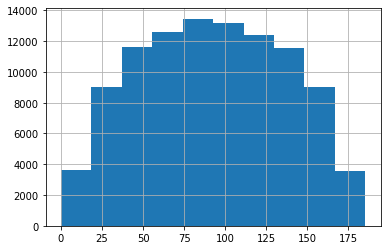

In [19]:
data_1['product'].hist();

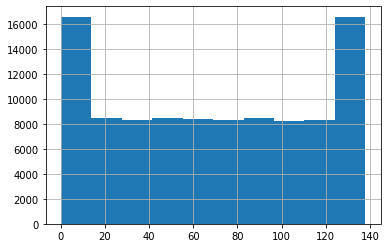

In [20]:
data_2['product'].hist();

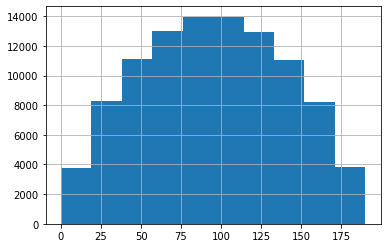

In [21]:
data_3['product'].hist();

## 3. Подготовка к расчету прибыли

In [22]:
BUDGET = 10**10
INCOME_PER_ONE_BARREL = 450*10**3

In [23]:
BUDGET_FOR_ONE_OIL_WELL = BUDGET / 200

In [24]:
BUDGET_FOR_ONE_OIL_WELL

50000000.0

In [25]:
BREAKEVEN_POINT = BUDGET / INCOME_PER_ONE_BARREL 

In [26]:
BREAKEVEN_POINT 

22222.222222222223

In [27]:
print('Объем нефти в скважине для безубыточного функционирования должен составлять не менее:', BREAKEVEN_POINT  / 200)

Объем нефти в скважине для безубыточного функционирования должен составлять не менее: 111.11111111111111


Запаса нефти по всем регионам недостаточно, чтобы окупить разработку. Необходимо найти скважины с максимальным запасом.

## 4. Расчет прибыли и рисков

In [28]:
def profit(predictions, target):
    top_preds = predictions.sort_values(ascending=False)
    top_target = target[top_preds.index][:200]
    revenue = top_target.sum() * INCOME_PER_ONE_BARREL
    return revenue - BUDGET

In [29]:
state = np.random.RandomState(12345)
def find_conf_interval_and_loss_risk(predictions, target):
    revenue = []
    for _ in range(1000):
        target_sample = target.sample(500, replace=True, random_state=state)
        predictions_sample = predictions[target_sample.index]
        revenue.append(profit(predictions_sample, target_sample)) 
        
    lower = int(np.percentile(revenue, 2.5))
    higher = int(np.percentile(revenue, 97.5))
    mean_revenue = int(sum(revenue) / len(revenue))
    risk = st.percentileofscore(revenue, 0)

    return ((lower, higher), mean_revenue, risk)

In [30]:
i = 1
for preds, target in zip([predictions_1, predictions_2, predictions_3], 
                         [validation_1, validation_2, validation_3]):
    interval, mean_revenue, risk = find_conf_interval_and_loss_risk(preds, target)
    print(f"Region {i}:")
    print(f"Mean: {mean_revenue}")
    print(f"95% confidence interval: {interval}")
    print(f"Risk of loss: {risk}")
    i+=1

Region 1:
Mean: 458100401
95% confidence interval: (-91938453, 1015824888)
Risk of loss: 4.6000000000000005
Region 2:
Mean: 533056709
95% confidence interval: (99430448, 973064424)
Risk of loss: 0.6000000000000001
Region 3:
Mean: 411076672
95% confidence interval: (-138944979, 959378918)
Risk of loss: 7.2


# Вывод

Самым перспективным (с максимальной прибылью и минимальными рисками) является регион 2.